# Exploratory Analysis

# Step 1 - Loading Python libraries

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

# Step 2: Reading into my data set

In [2]:
#Read in data from source 
df_movies = pd.read_csv("../03-exploratory-analysis/movies.csv")
df_ratings = pd.read_csv("../03-exploratory-analysis/ratings.csv")
df_users = pd.read_csv("../03-exploratory-analysis/users.csv")

# Looking at data and manipulate where needed

In [3]:
#Movies
print (df_movies.head(10))
df_movies.info()

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
5        6                         Heat (1995)         Action|Crime|Thriller
6        7                      Sabrina (1995)                Comedy|Romance
7        8                 Tom and Huck (1995)          Adventure|Children's
8        9                 Sudden Death (1995)                        Action
9       10                    GoldenEye (1995)     Action|Adventure|Thriller
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 

In [7]:
# Counting observations in dataframe 
df_movies.count()

MovieID    3883
Title      3883
Genres     3686
dtype: int64

In [8]:
# Checking for missing values in dataframe
df_movies.isnull().values.any()

# Counting the number of NaN values in each column 
print(df_movies.isnull().sum())

MovieID      0
Title        0
Genres     197
dtype: int64


In [9]:
# Dropping rows with 197 genres missing and re assigning
df_moviesc = df_movies.dropna()
df_moviesc.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [10]:
# Checking the missing values are gone - Good to go!
df_moviesc.isnull().values.any()
df_moviesc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3686 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3686 non-null int64
Title      3686 non-null object
Genres     3686 non-null object
dtypes: int64(1), object(2)
memory usage: 115.2+ KB


In [11]:
#Ratings
print (df_ratings.head(10))
df_ratings.info()

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
5       1     1197       3  978302268
6       1     1287       5  978302039
7       1     2804       5  978300719
8       1      594       4  978302268
9       1      919       4  978301368
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [12]:
# Counting observations in dataframe 
df_ratings.count()

# Checking for missing values in dataframe
df_ratings.isnull().values.any()

# Re assigning to 'cleaned' df - Good to go!
df_ratingsc = df_ratings
df_ratingsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [13]:
#Users
print (df_users.head(10))
df_users.info()

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7     2460
4       5      M   25          20    55455
5       6      F   50           9    55117
6       7      M   35           1     6810
7       8      M   25          12    11413
8       9      M   25          17    61614
9      10      F   35           1    95370
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [14]:
# Counting observations in dataframe 
df_users.count()

# Re assigning to 'cleaned' df - Good to go!
df_usersc = df_users
df_usersc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


# Create dictionary with movie frequency per user

In [15]:
#Should have 6,040 users and 3,706 movies
df_ratingsc['MovieID'].nunique()
df_ratingsc['UserID'].nunique()

6040

In [16]:
#Creating crosstab
df= (pd.crosstab(df_ratingsc["UserID"],df_ratingsc["MovieID"],margins=True))
df.drop_duplicates()
df.head(10)

MovieID,1,2,3,4,5,6,7,8,9,10,...,3944,3945,3946,3947,3948,3949,3950,3951,3952,All
UserID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,129
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,198
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
8,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,139
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,106


In [17]:
# Getting rid of double heading in dataframe by renaming index and columns - Ready to go!
df.columns.name = 'MovieID'
df.index.name = ''

#Re assigning
df_usermovie = df
df_usermovie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6041 entries, 1 to All
Columns: 3707 entries, 1 to All
dtypes: int64(3707)
memory usage: 170.9+ MB


# First thoughts on dataset exploratory analysis

My data is related to movie content and is distributed across 3 dataframes:

- Movie df where we dropped some missing values and now shows 3,686 observations aross 3 columns (MovieID, Title and Genres)

- Ratings df showing 1,000,209 observations across 4 columns (UserID, MovieID, Rating, Timestamp)

- Users df showing 6,040 entries across 5 columns (UserID, Gender, Age, Occupation and Zip-code)

I will combine the above dataframes into one single one for easy data manipulation and analysis.

In addition, I've created a frequency table for users (6,041 rows) and movies watched (3,707 columns)

# Creating a summary table from three dataframes

In [18]:
# Bringing title and genres info into ratingsc dataframe

results = df_ratingsc.merge(df_moviesc, on='MovieID')
results.head()
#results.info()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [21]:
# Bringing user demographic info into ratingsc dataframe and reassigning to dfc (dataframe 'cleaned')

dfc = results.merge(df_usersc, on='UserID')
dfc.head(10)

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
5,1,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,F,1,10,48067
6,1,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama,F,1,10,48067
7,1,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama,F,1,10,48067
8,1,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,F,1,10,48067
9,1,919,4,978301368,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,F,1,10,48067


In [22]:
# Checking for missing values in cleaned dataframe - Good to go!
dfc.isnull().values.any()

False

# More exploratory analysis on data (dfc and df_usermovie frequency table)

In [23]:
# Having a quick look at data in our variables with descriptive statistics 
dfc.head()
#Variables: Rating, Title, Genres, Gender,Age, Ocupation,Zip-code

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [24]:
# My dataframe contains integers and some object data types and a total of 936,381 rows and 10 columns
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936381 entries, 0 to 936380
Data columns (total 10 columns):
UserID        936381 non-null int64
MovieID       936381 non-null int64
Rating        936381 non-null int64
Timestamp     936381 non-null int64
Title         936381 non-null object
Genres        936381 non-null object
Gender        936381 non-null object
Age           936381 non-null int64
Occupation    936381 non-null int64
Zip-code      936381 non-null object
dtypes: int64(6), object(4)
memory usage: 78.6+ MB


# Ratings

In [25]:
#Descriptive statistics
dfc.Rating.describe()

count    936381.000000
mean          3.593489
std           1.106080
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: Rating, dtype: float64

Users seem happy with the movies they watch in general because ratings are generous 
with the mean sitting at 3.59 out of 5 scale and half the movies have a rating of 4.
We don't seem to have outliers (standard deviation is under 3)

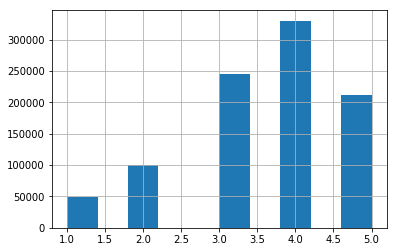

In [26]:
# Plotting data to see how ratings are distributed
dfc.Rating.hist()

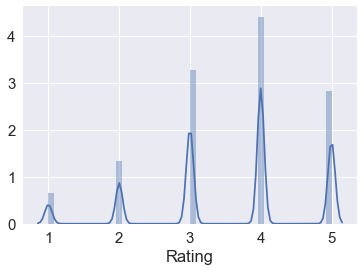

In [27]:
# Display distribution of rating
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

sns.distplot(dfc['Rating'].fillna(dfc['Rating'].median()))

Users mainly gave movies ratings of 3, 4 or 5 so our rantings data distribution is skewed towards the right.

Each user rated at least 20 movies so there could be other factors influencing the positiveness of movie ratings (e.g. rating scale used being understood by users differently, orientation of scale influencing their rating behaviour..) and therefore having an impact on the rating distribution in addition to the quality of movies.

In [28]:
# Displaying 20 movies with the highest ratings
dfc[['Title','Genres','Rating']].sort_values('Rating', ascending=False).head(20)

,Title,Genres,Rating
0,One Flew Over the Cuckoo's Nest (1975),Drama,5
304457,Seven Years in Tibet (1997),Drama|War,5
304473,Apollo 13 (1995),Drama,5
304469,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,5
304468,"Christmas Story, A (1983)",Comedy|Drama,5
304467,Ben-Hur (1959),Action|Adventure|Drama,5
304465,One Flew Over the Cuckoo's Nest (1975),Drama,5
698909,Better Living Through Circuitry (1999),Documentary,5
304458,"Devil's Advocate, The (1997)",Crime|Horror|Mystery|Thriller,5
304454,Starship Troopers (1997),Action|Adventure|Sci-Fi|War,5


In [29]:
# Rating skewness  
dfc.Rating.skew()

-0.5563443959618599

In [30]:
# Rating kurtosis
dfc.Rating.kurt()

-0.3246913073388673

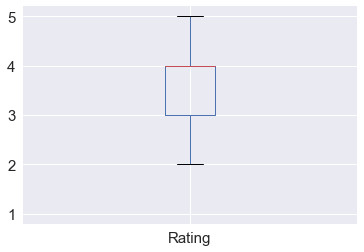

In [31]:
#Rating boxplot
dfc.Rating.plot(kind='box')

Our ratings distribution is negatively skewed (skew= -0.56) and shows a 'flat-ish' shape (smooth bell shape with light tails) in relation to a normal distribution (kurtosis =-0.32)

Our box plot shows no outliers (this is after I removed an outlier found and as explained in subsequent steps in this notebook)
and an important concentration of values making the distribution skewed towards the right side as explained

# Titles

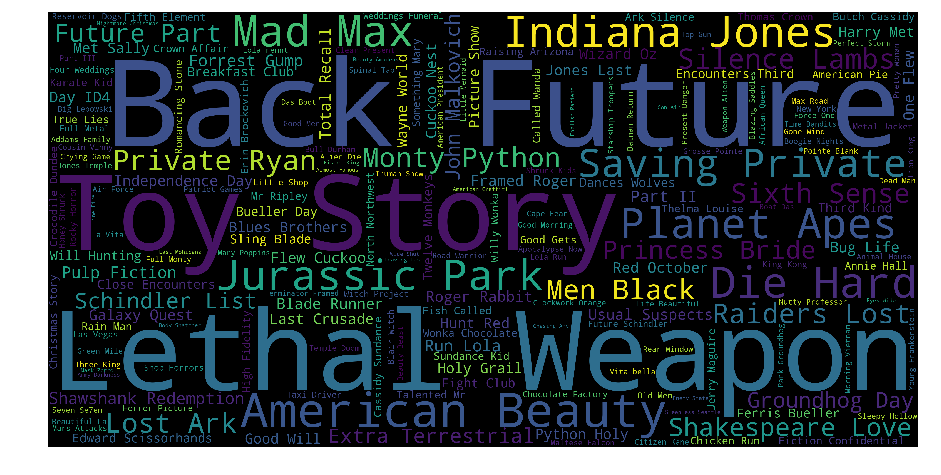

In [32]:
#Making a wordcloud from movie titles to have an overview of most popular movies

import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
dfc['Title'] = dfc['Title'].fillna("").astype('str')
title_corpus = ' '.join(dfc['Title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

I do not expect movie titles to be a significant variable in my analysis and only exploring to have a general idea of the information included in the variable

In [33]:
#While investigating word cloud results I came across an incorrect genre for movies: 'Miami Beach (1988)' 

#I went back to the beggining of my exploratory analysis and drop this observation too - Good to go!
dfc.Genres.unique()

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Adventure|Children's|Drama|Musical", 'Musical', 'Comedy',
       "Animation|Children's", 'Comedy|Fantasy', 'Comedy|Sci-Fi',
       'Drama|War', 'Romance', "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-Fi", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', "Children's|Comedy|Musical",
       'Action|Drama|War', "Children's|Drama", 'Crime|Drama|Thriller',
       'Action|Crime|Drama', 'Crime|Drama',
       'Action|Adventure|Sci-Fi|Thriller', 'Action|Thriller',
       'Action|Drama', 'Comedy|Drama|Western', 'Action|Adventure|Crime',
       'Action|Crime|Mystery|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Drama|War'

# Genres

The genres variable will surely be important while building the recommendation engine since it describes the content of the film. I will look into which genres are the most popular and visualize findings.

In [35]:
# Make a census of the genre keywords
genre_labels = set()
for s in dfc['Genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))


In [36]:
# Function that counts the number of times each of the genre keywords appear

def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
 # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [37]:
# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(dfc, 'Genres', genre_labels)


In [38]:
# Find genres by popularity
keyword_occurences[:5]

[['Drama', 343343],
 ['Comedy', 343194],
 ['Action', 223137],
 ['Thriller', 178402],
 ['Romance', 142769]]

The top 5 genres by popularity are: Drama, Comedy, Action, Thriller, and Romance. 
I'll show this on a wordcloud too in order to make it more visually appealing.
I do expect genres to be an important variable in our engine recommendation analysis.

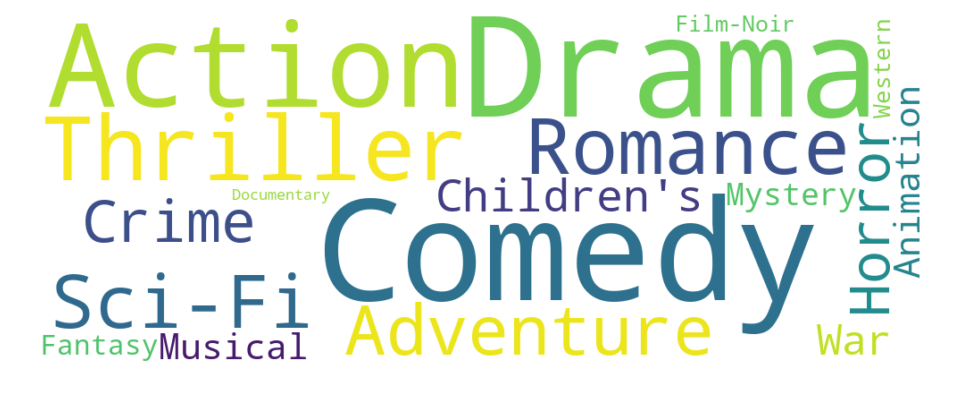

In [39]:
#Genres wordcloud

# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Demographics analysis

# Gender

In [40]:
#Gender counts (absolute) 
Gender = dfc['Gender'].value_counts()
Gender

M    702551
F    233830
Name: Gender, dtype: int64

In [41]:
#Gender counts (relative) 
# 75.02% of users are male and 24.97% are female

Gender_total = Gender.M + Gender.F
Gender_total

print ((Gender / Gender_total) * 100)

M    75.028327
F    24.971673
Name: Gender, dtype: float64


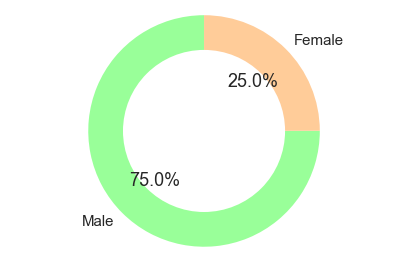

In [42]:
#Visualizing Gender.

# Pie chart
labels = ['Male', 'Female']
sizes = [75.028327,24.971673]
#colors
colors = ['#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Our dataset skews towards males

# Age

In [43]:
#Age counts (absolute) 
Age  = dfc['Age'].value_counts()
Age

25    369626
35    187220
18    170017
45     78902
50     68627
56     36915
1      25074
Name: Age, dtype: int64

In [44]:
#Age counts (relative) 
Age_total = sum(Age)
print ((Age / Age_total) * 100)

25    39.473889
35    19.993998
18    18.156819
45     8.426271
50     7.328961
56     3.942306
1      2.677756
Name: Age, dtype: float64


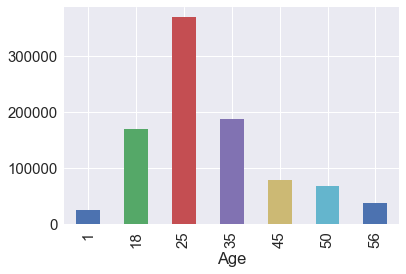

In [39]:
#Visualizing Age. 

dfc.groupby('Age').size().plot(kind='bar')

#Age key
#1:  "Under 18"
#18:  "18-24"
#25:  "25-34"
#35:  "35-44"
#45:  "45-49"
#50:  "50-55"
#56:  "56+"

Our dataset shows skew towards 18 - 44 years old (18-24, 25-34 and 35-44) and the most frequent age range is 25-34 years old

# Occupation

In [45]:
#Occupation counts (absolute) 
Occupation  = dfc['Occupation'].value_counts()
Occupation

0     122290
4     121639
7      98964
1      80600
17     67305
20     57011
12     52789
2      47197
14     46249
16     43294
6      35109
3      29902
15     21435
10     21331
5      20354
11     19444
19     13831
13     13065
18     11249
9      10807
8       2516
Name: Occupation, dtype: int64

In [46]:
#Occupation counts (relative) 
Occupation_total = sum(Occupation)
Occupation_freq = (Occupation / Occupation_total) * 100
Occupation_freq

0     13.059855
4     12.990332
7     10.568775
1      8.607607
17     7.187779
20     6.088440
12     5.637556
2      5.040363
14     4.939122
16     4.623545
6      3.749435
3      3.193358
15     2.289132
10     2.278026
5      2.173688
11     2.076505
19     1.477070
13     1.395265
18     1.201327
9      1.154124
8      0.268694
Name: Occupation, dtype: float64

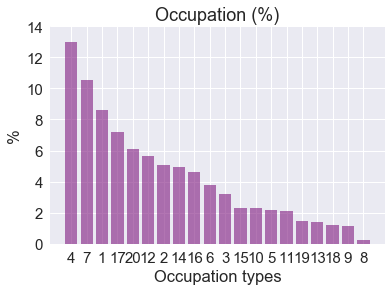

In [47]:
#Visualizing Occupation. 

# Adding occupation frequencies (%) manually to populate bar chart (excluding #0:  "other" or not specified)
height = [12.990332,10.568775,8.607607,7.187779,6.08844,5.637556,5.040363,4.939122,4.623545,3.749435,3.193358,
          2.289132,2.278026,2.173688,2.076505,1.47707,1.395265,1.201327,1.154124,0.268694]
bars = (4,7,1,17,20,12,2,14,16,6,3,15,10,5,11,19,13,18,9,8)
y_pos = np.arange(len(bars))
  
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Occupation (%)')
plt.xlabel('Occupation types')
plt.ylabel('%')
 
# Limits for the Y axis
plt.ylim(0,14)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

#Ocupation key
#0:  "other" or not specified
#1:  "academic/educator"
#2:  "artist"
#3:  "clerical/admin"
#4:  "college/grad student"
#5:  "customer service"
#6:  "doctor/health care"
#7:  "executive/managerial"
#8:  "farmer"
#9:  "homemaker"
#10:  "K-12 student"
#11:  "lawyer"
#12:  "programmer"
#13:  "retired"
#14:  "sales/marketing"
#15:  "scientist"
#16:  "self-employed"
#17:  "technician/engineer"
#18:  "tradesman/craftsman"
#19:  "unemployed"
#20:  "writer"

Our dataset shows skew towards students, professionals, academics and technicians so we have an heterogeneous group overall

Top four occupations are:

4:  "college/grad student"
7:  "executive/managerial"
1:  "academic/educator"
17:  "technician/engineer"

# Zip code

In [48]:
#Zip-code counts (absolute) 
Zip = dfc['Zip-code'].value_counts()
Zip.head(10)

94110    3634
60640    3292
98103    3045
2138     2880
95616    2880
55408    2629
48135    2575
97401    2511
10024    2477
10025    2470
Name: Zip-code, dtype: int64

In [49]:
#Zip-code counts (relative) 
Zip_total = sum(Zip)
Zip_freq = (Zip / Zip_total) * 100
Zip_freq.head(10)

94110    0.388090
60640    0.351566
98103    0.325188
2138     0.307567
95616    0.307567
55408    0.280762
48135    0.274995
97401    0.268160
10024    0.264529
10025    0.263782
Name: Zip-code, dtype: float64

There is a good spread out of geographies when looking at zip code and our users seem to be based in US across different states.

The top five Zip codes belong to:

San Francisco (94110)
Chicago (60640)
Seattle (98103)
South Carolina (2138)
Californnia (95616)

Ideally we would run geo-spatial analysis and plot ur zip-codes into a geographic heat map but I won't be exploring this variable in detail because I do not expect it to be necessary for our engine recommendation analysis at this point.

# User's movie frequency

In [50]:
#Find total number of users that watched each movie

moviewatched = df_usermovie.iloc[6040:]
moviewatched


MovieID,1,2,3,4,5,6,7,8,9,10,...,3944,3945,3946,3947,3948,3949,3950,3951,3952,All
,,,,,,,,,,,,,,,,,,,,,
All,2077,701,478,170,296,940,458,68,102,888,...,9,43,100,55,862,304,54,40,388,1000209


In [51]:
#Arranging my dataframe

#Transposing dataframe
moviewatchedT = moviewatched.reset_index().T

#Dropping first and last rows with 'All' from dataframe
moviewatchedT = moviewatchedT.iloc[1:]
moviewatchedc = moviewatchedT[:-1]
moviewatchedc.head()

,0
MovieID,
1,2077
2,701
3,478
4,170
5,296


In [197]:
#Star Wars movies are included in my moviewatchedrank table (MovieID) and come from df_movies original set
#But these observations we dropped from dfc set so I need to drop them from moviewatchedrank too to avoid discrepancies

#df_movies[df_movies['Title'].str.contains("Star Wars")]

In [52]:
#Reindexing to allow me finding MovieID column easily 
movierank = moviewatchedc.reset_index() 
movierank.head()

,MovieID,0
0,1,2077
1,2,701
2,3,478
3,4,170
4,5,296


In [53]:
#My frequency table (movierank) shows 3,702 MovieIDs but my dfc table shows 3,512 MovieID so I
#need to drop 190 MovieIDs from movierank (3,512 rows in total) to remove the discrepancy between sets

#movierank.MovieID.nunique()
#dfc.MovieID.nunique()

#Identifying MovieIDs not matching dfc.MovieID 
index_clean=movierank[~ movierank.MovieID.isin(dfc.MovieID.values)].index.values
#df_compare
#len(df_compare.index.values)

#Dropping 190 incorrect rows to align against dfc.MovieID - 3,512 rows, Good to go!
#df.drop(df.index[[2,3]]) ..
movierankc =movierank.drop(movierank.index[[index_clean]])
movierankc.info()
movierankc.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3512 entries, 0 to 3705
Data columns (total 2 columns):
MovieID    3512 non-null int64
0          3512 non-null object
dtypes: int64(1), object(1)
memory usage: 82.3+ KB


,MovieID,0
0,1,2077
1,2,701
2,3,478
3,4,170
4,5,296
5,6,940
6,7,458
7,8,68
8,9,102
9,10,888


In [54]:
#Finally finding most popular movies by number of users watched them (ranking)

moviewatchedrank = movierankc.sort_values(0, ascending=False)

#Giving a name to my users' frequency column
moviewatchedrank.columns = ['MovieID', 'Users_count']
moviewatchedrank.head()

#Finding the titles of top 5 movies
#dfc.loc[dfc['MovieID'] == 2858]

,MovieID,Users_count
2651,2858,3428
466,480,2672
1848,2028,2653
2374,2571,2590
1178,1270,2583


In [63]:
#Pickling my dataframes for future use
moviewatchedrank.to_pickle('moviefreq.pkl') 

dfc.to_pickle('dfc.pkl')


The top 5 movie titles most watched are:

Ranking  MovieID Title 
1       2858      American Beauty (1999)
2       480       Jurassic Park (1993)
3       2028      Saving Private Ryan (1998)
4       2571      Matrix, The (1999)
5       1270      Back to the Future (1985)

# Findings on exploratory analysis

We've loaded, prepared and explored our data for further analysis. Our data should be cleaned enough now to ensure meaning results when used in our model. If coming across any further data issues, I expect to deal with them on the spot. However, they should not happen or be minimal at from this stage.

Our main variables are ratings, genres and users. 

We've confirmed that our ratings tend to be quite positive considering a scale of 5. Its distribution is negatively skewed and 
we don't seem to have outliers. Different variables other than the quality of movies could be impacting user's ratings but I won't be exploring them as they are out of scope for the purposes of this analysis.

The most popular movie genres are Drama, Comedy, Action, Thriller, and Romance. 

Movie users tend to be males, 18 - 44 years old, work in a variety of occupations (e.g. students, professionals, academics and technicians) and be located across US states.

The top five movie titles most watched by users are:

American Beauty (1999)
Jurassic Park (1993)
Saving Private Ryan (1998)
Matrix, The (1999)
Back to the Future (1985)

These findings set the ground for our recommendation engine which we will be developing in my technical final notebook
